# Author- Rishikesh Amle

GRIP @ The Sparks Foundation

Task 2:Prediction using Unsupervised ML

Aim: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

# Prediction using Unsupervised ML

# Importing Libraries¶

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#checking shape of data
df.shape

(150, 6)

In [12]:
#dropping Id column
df.drop('Id',axis=1,inplace=True)

In [13]:
#Checking null value
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

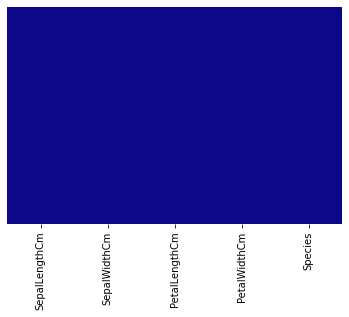

In [14]:
#check for columnwise null values, if it is present the heatmap will show yellow lines for every row
sns.heatmap(df.isnull(),yticklabels=False,cmap='plasma',cbar=False)
plt.show()


In [15]:
#information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
#statistical information of numerical variable
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Visualization of data

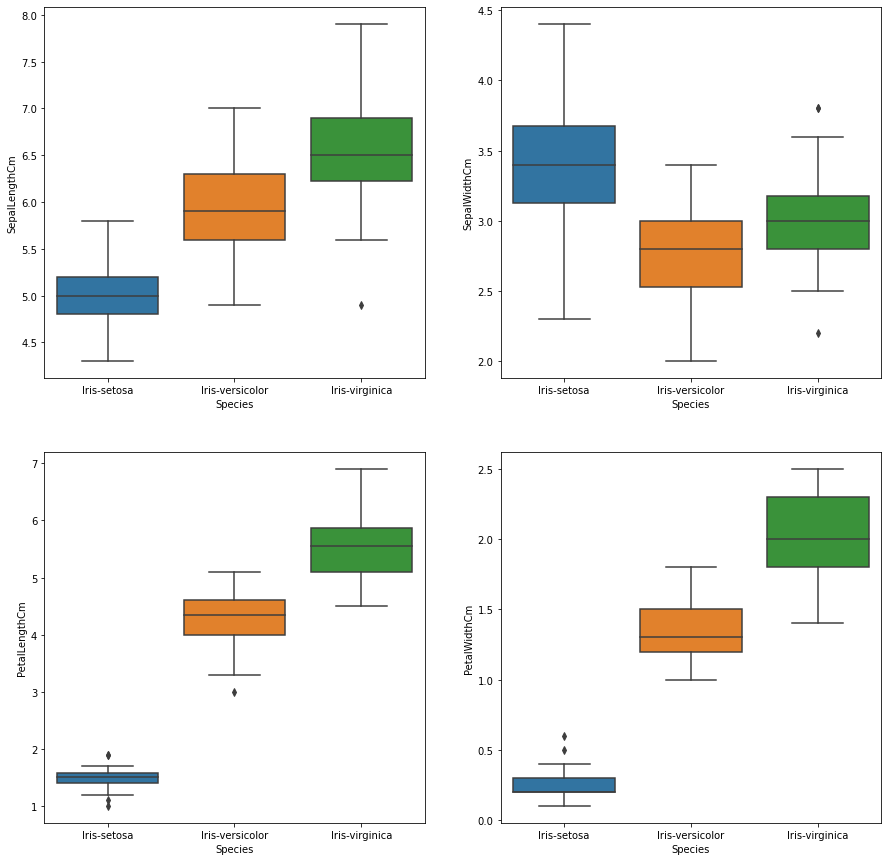

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        sns.boxplot(x =df['Species'],y = df[df.columns[2 * i + j]], ax=axs[i,j])
plt.show()

From this we can say the Iris-virginica have maximum SepalLengthCm ,PetalLengthCm and PetalWidth. Iris-setosa has maximum SepalWidthCm.

# Outlier tretment¶

In [19]:
from scipy import stats
z = np.abs(stats.zscore(df.drop('Species',axis=1)))
print(z)

[[9.00681170e-01 1.03205722e+00 1.34127240e+00 1.31297673e+00]
 [1.14301691e+00 1.24957601e-01 1.34127240e+00 1.31297673e+00]
 [1.38535265e+00 3.37848329e-01 1.39813811e+00 1.31297673e+00]
 [1.50652052e+00 1.06445364e-01 1.28440670e+00 1.31297673e+00]
 [1.02184904e+00 1.26346019e+00 1.34127240e+00 1.31297673e+00]
 [5.37177559e-01 1.95766909e+00 1.17067529e+00 1.05003079e+00]
 [1.50652052e+00 8.00654259e-01 1.34127240e+00 1.18150376e+00]
 [1.02184904e+00 8.00654259e-01 1.28440670e+00 1.31297673e+00]
 [1.74885626e+00 3.56360566e-01 1.34127240e+00 1.31297673e+00]
 [1.14301691e+00 1.06445364e-01 1.28440670e+00 1.44444970e+00]
 [5.37177559e-01 1.49486315e+00 1.28440670e+00 1.31297673e+00]
 [1.26418478e+00 8.00654259e-01 1.22754100e+00 1.31297673e+00]
 [1.26418478e+00 1.24957601e-01 1.34127240e+00 1.44444970e+00]
 [1.87002413e+00 1.24957601e-01 1.51186952e+00 1.44444970e+00]
 [5.25060772e-02 2.18907205e+00 1.45500381e+00 1.31297673e+00]
 [1.73673948e-01 3.11468391e+00 1.28440670e+00 1.050030

In [21]:
threshold = 3
print(np.where(z > 3))

(array([15], dtype=int64), array([1], dtype=int64))


In [22]:
df = df[(z < 3).all(axis=1)]

In [23]:
df.shape

(149, 5)

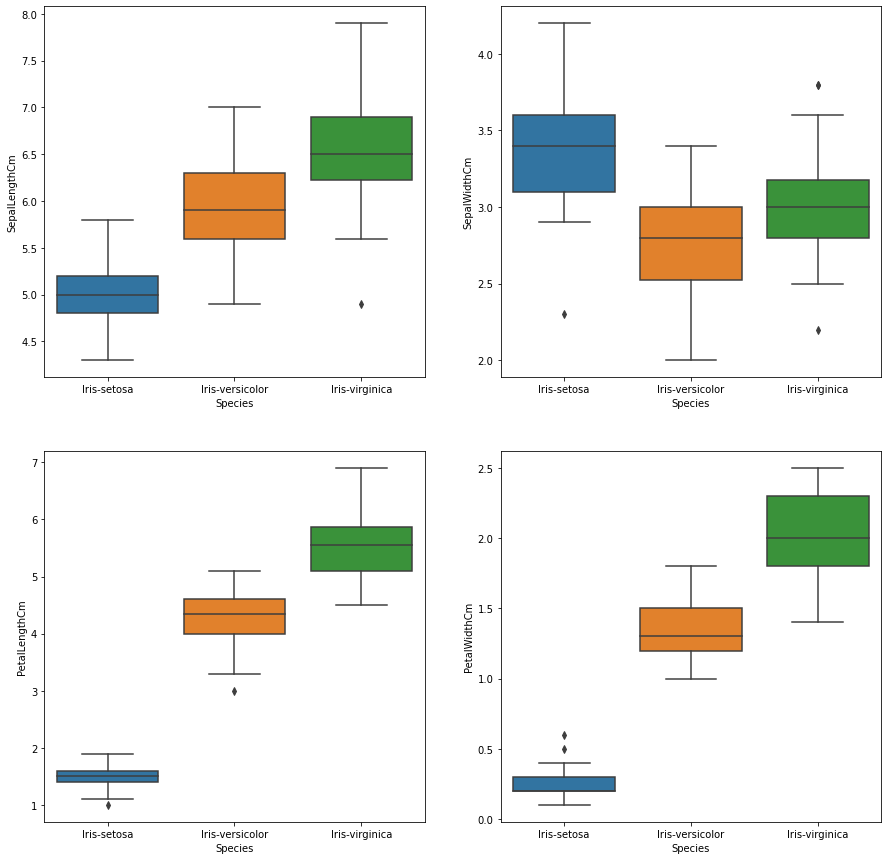

In [24]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))
for i in range(2):
    for j in range(2):
        sns.boxplot(x =df['Species'],y = df[df.columns[2 * i + j]], ax=axs[i,j])
plt.show()

# Plotting Relation of each variable with other

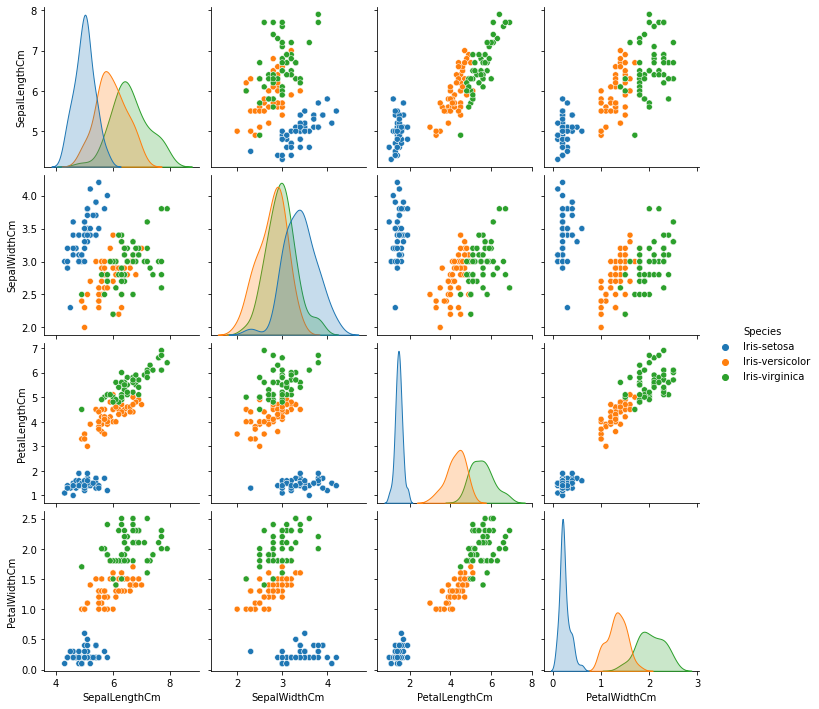

In [26]:
sns.pairplot(df, hue='Species')
plt.show()

# Finding Optimal no. of cluster for K-Means

In [27]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, :4].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Elbow method

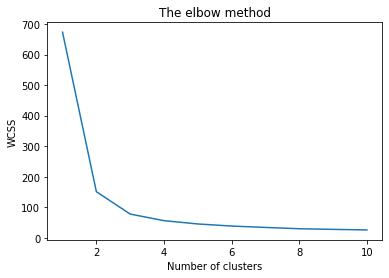

In [28]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

You can clearly see why it is called 'The elbow method' from the above graph, the optimum clusters is where the elbow occurs. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

# Choosing k=3 which is optimal¶

In [29]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

# plotting clusters¶

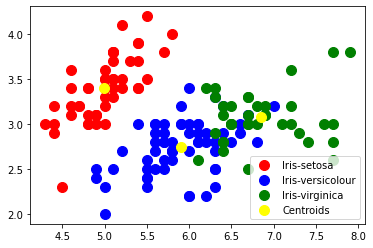

In [30]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()